## 1. Introduction
In this notebook, we will tackle the problem of detecting fraudulent transactions using anomaly detection techniques such as Isolation Forest and One-Class SVM.


## 2. Setup


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [52]:
df = pd.read_csv('/content/creditcard.csv')  # Adjust delimiter as needed


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65448,51589,-0.248790,1.080973,-0.917017,-0.976831,3.234594,2.963384,0.673578,0.509785,-0.674202,...,-0.160001,-0.482385,-0.326914,0.885378,0.220774,0.300600,-0.277872,-0.146796,0.76,0.0
65449,51589,1.130476,0.090195,0.358313,0.579876,-0.413699,-0.873547,0.192253,-0.105390,-0.005114,...,-0.438925,-1.421174,0.310895,0.353704,-0.083121,-0.015829,-0.046818,0.021914,42.90,0.0
65450,51590,1.298511,0.103767,0.026676,0.239810,0.066831,-0.021495,-0.125705,0.066416,-0.000780,...,-0.292495,-0.919318,-0.009714,-0.866837,0.313025,0.152421,-0.040222,-0.004856,1.98,0.0
65451,51591,-1.062891,0.242080,2.425183,1.125829,-1.284732,1.535764,-0.524604,1.074866,0.627453,...,0.194731,0.719323,0.072734,0.042001,0.060638,-0.254387,0.012123,0.010512,113.65,0.0


In [64]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [47]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,...,3973.000000,3973.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000
mean,1638.724138,-0.333723,0.308691,0.837062,0.013144,-0.029177,0.052836,0.146895,-0.071352,0.055778,...,0.010465,-0.082885,-0.058484,0.029106,0.095278,-0.012623,0.044638,0.002639,65.000101,0.000504
std,1016.577498,1.351976,1.180436,0.981057,1.418751,1.207632,1.286610,1.090769,1.294647,0.919087,...,0.855829,0.635482,0.391158,0.603965,0.405989,0.503818,0.352752,0.254136,213.688183,0.022437
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-11.164794,-23.632502,-3.336805,...,-11.273890,-5.707801,-7.996811,-2.162523,-2.322906,-1.338556,-5.336289,-2.909294,0.000000,0.000000
25%,750.000000,-1.030747,-0.155734,0.287224,-0.908469,-0.573740,-0.735876,-0.278697,-0.205430,-0.473894,...,-0.211812,-0.512434,-0.210615,-0.338940,-0.141891,-0.339998,-0.041461,-0.020983,2.265000,0.000000
50%,1526.000000,-0.451819,0.409641,0.884503,0.099497,-0.089809,-0.209577,0.162196,0.028639,0.032286,...,-0.053234,-0.064435,-0.069939,0.100635,0.108219,-0.025647,0.033751,0.021264,12.990000,0.000000
75%,2526.000000,1.070572,0.921588,1.433851,0.982710,0.396675,0.449217,0.635055,0.298866,0.622704,...,0.102520,0.345346,0.062502,0.432692,0.361309,0.288406,0.205736,0.087058,54.990000,0.000000
max,3624.000000,1.685314,6.118940,4.017561,6.013346,10.658654,21.393069,34.303177,3.877662,6.450992,...,15.631453,4.393846,4.095021,1.215279,1.727063,3.463246,3.852046,4.157934,7712.430000,1.000000


## 4. Data Preprocessing

In this section, we will prepare the data for modeling by handling missing values, scaling features, and performing any necessary feature engineering.


## 5. Exploratory Data Analysis (EDA)

We'll now dive into the dataset to discover patterns, spot anomalies, and test hypotheses with statistics and visualizations.

In [25]:
# Handling missing values
df.fillna(df.mean(), inplace=True)  # Replace missing values with the mean of each column

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Amount', 'Time']])  # Scale 'Amount' and 'Time' features
df['Amount_scaled'] = scaled_features[:, 0]
df['Time_scaled'] = scaled_features[:, 1]

# Feature engineering
df['Amount_to_mean'] = df['Amount'] / df['Amount'].mean()  # Create a new feature comparing transaction amount to the mean


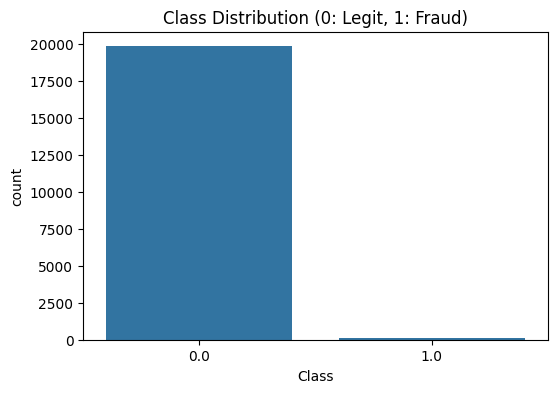

               Time            V1            V2            V3            V4  \
count  19898.000000  19898.000000  19898.000000  19898.000000  19898.000000   
mean   15492.416374     -0.244326      0.242420      0.745774      0.277011   
std    10512.066686      1.889986      1.527342      1.767726      1.466218   
min        0.000000    -30.552380    -40.978852    -31.103685     -5.172595   
25%     4536.250000     -0.959632     -0.329008      0.309235     -0.636713   
50%    14796.000000     -0.302521      0.220079      0.898672      0.224608   
75%    26220.500000      1.164473      0.870117      1.532922      1.142143   
max    30633.000000      1.960497     16.713389      4.101716     11.927512   

                 V5            V6            V7            V8            V9  \
count  19898.000000  19898.000000  19898.000000  19898.000000  19898.000000   
mean      -0.163264      0.092881     -0.145279      0.022237      0.636382   
std        1.430821      1.331029      1.338260    

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of the classes
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Legit, 1: Fraud)')
plt.show()

# Check basic statistics
print(df.describe())




# Calculate the percentages of legit and fraud transactions


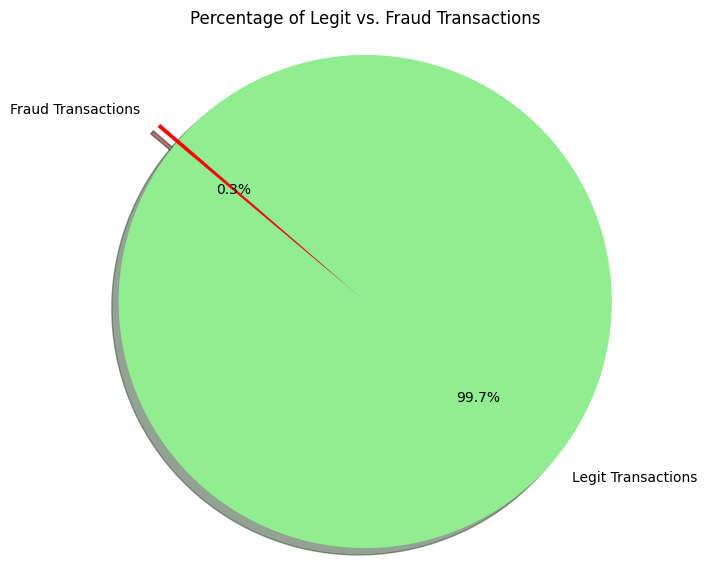

In [69]:
import matplotlib.pyplot as plt

total_cases = df['Class'].count()
num_legit = df['Class'].value_counts()[0]
num_fraud = df['Class'].value_counts()[1]

legit_percentage = (num_legit / total_cases) * 100
fraud_percentage = (num_fraud / total_cases) * 100

# Data to plot
labels = 'Legit Transactions', 'Fraud Transactions'
sizes = [legit_percentage, fraud_percentage]
colors = ['lightgreen', 'red']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Legit vs. Fraud Transactions')
plt.show()


## Distribution of Transaction Amounts by Class

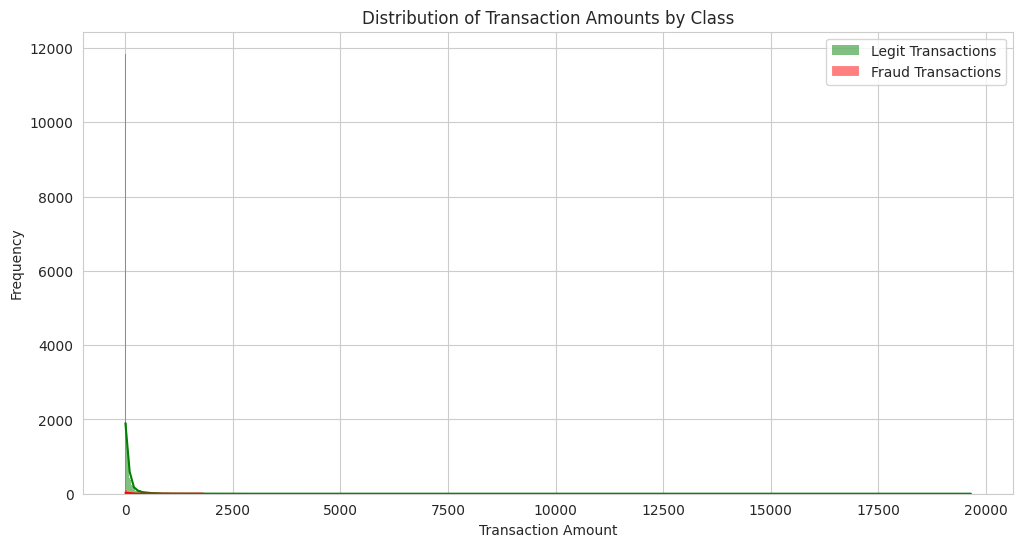

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(df[df['Class'] == 0]['Amount'], color='green', label='Legit Transactions', kde=True)
sns.histplot(df[df['Class'] == 1]['Amount'], color='red', label='Fraud Transactions', kde=True)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts by Class')
plt.legend()
plt.show()


## Time of Transaction vs. Amount for Fraudulent Transactions

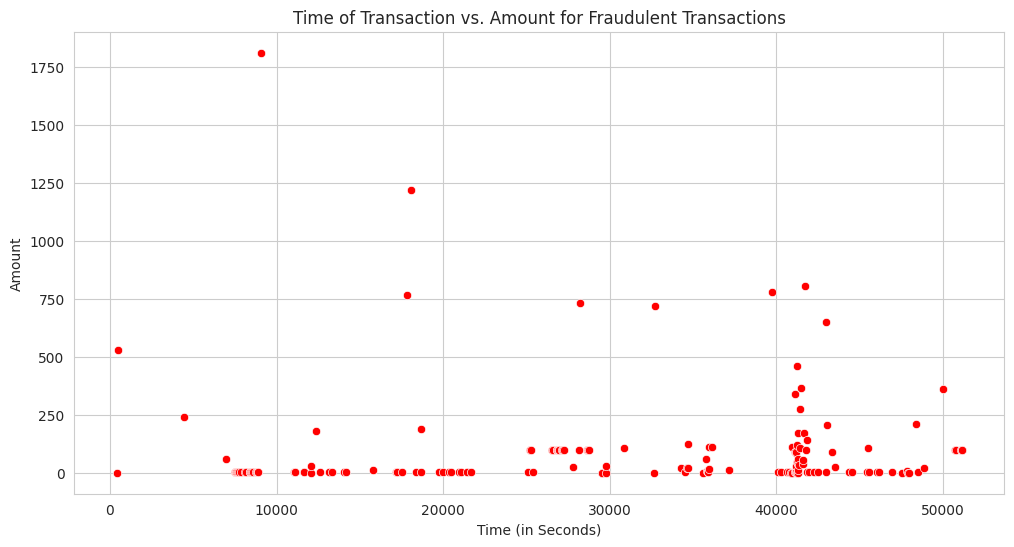

In [71]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Time', y='Amount', data=df[df['Class'] == 1], color='red')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.title('Time of Transaction vs. Amount for Fraudulent Transactions')
plt.show()


## Heatmap of Correlation Between Features

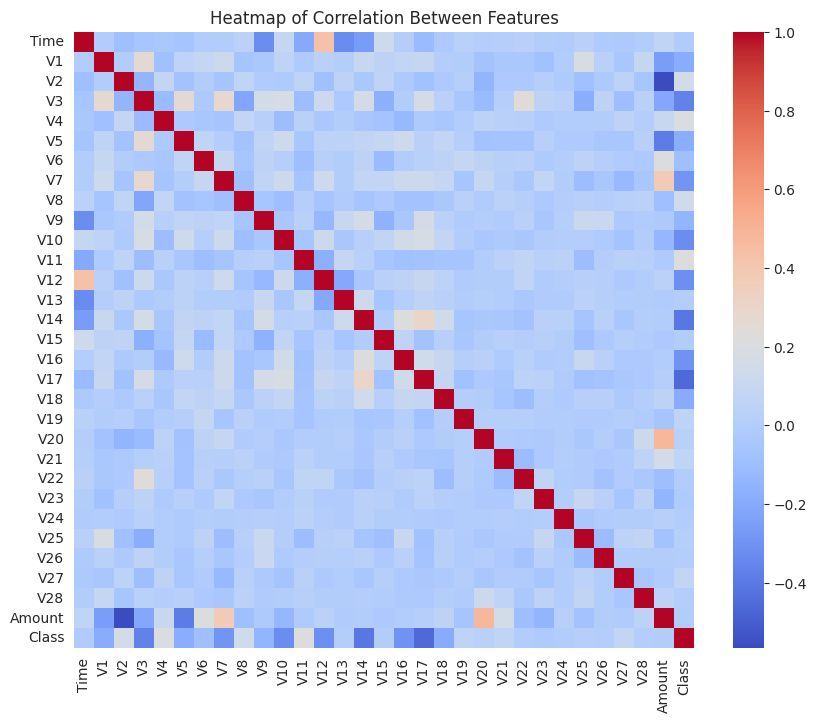

In [76]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Heatmap of Correlation Between Features')
plt.show()


## 6. Modeling

We will use the Isolation Forest algorithm to identify outliers which could represent fraudulent transactions in our dataset. This section will cover the model's theoretical background, its training, and parameter tuning.


In [55]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer


# Features and target
X = df.drop(columns=['Class', 'Time'])  # Drop 'Class' (target) and 'Time' (not needed)
y = df['Class']

# Handle any missing values in the target (y_train, y_test)
y.fillna(0, inplace=True)  # You can replace NaN with 0 or another appropriate value

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handling missing values by imputing with the mean for feature columns
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on training data and transform both train and test sets
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train Isolation Forest model
model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
model.fit(X_train_imputed)

# Predictions (Note: IsolationForest detects outliers as -1 and inliers as 1)
y_pred_train = model.predict(X_train_imputed)
y_pred_test = model.predict(X_test_imputed)

# Convert predictions: -1 -> 1 (fraud), 1 -> 0 (not fraud)
y_pred_train = [1 if x == -1 else 0 for x in y_pred_train]
y_pred_test = [1 if x == -1 else 0 for x in y_pred_test]

# Evaluate the model
print("Train set classification report:")
print(classification_report(y_train, y_pred_train))
print("Test set classification report:")
print(classification_report(y_test, y_pred_test))

# Print confusion matrix and accuracy
print("Train set confusion matrix:")
print(confusion_matrix(y_train, y_pred_train))
print("Test set confusion matrix:")
print(confusion_matrix(y_test, y_pred_test))

print("Train set accuracy: ", accuracy_score(y_train, y_pred_train))
print("Test set accuracy: ", accuracy_score(y_test, y_pred_test))


Train set classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     52226
         1.0       0.06      0.87      0.11       136

    accuracy                           0.96     52362
   macro avg       0.53      0.92      0.55     52362
weighted avg       1.00      0.96      0.98     52362

Test set classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     13058
         1.0       0.06      0.85      0.11        33

    accuracy                           0.96     13091
   macro avg       0.53      0.91      0.54     13091
weighted avg       1.00      0.96      0.98     13091

Train set confusion matrix:
[[50378  1848]
 [   18   118]]
Test set confusion matrix:
[[12593   465]
 [    5    28]]
Train set accuracy:  0.9643634696917612
Test set accuracy:  0.9640974715453365


# Confusion matrices

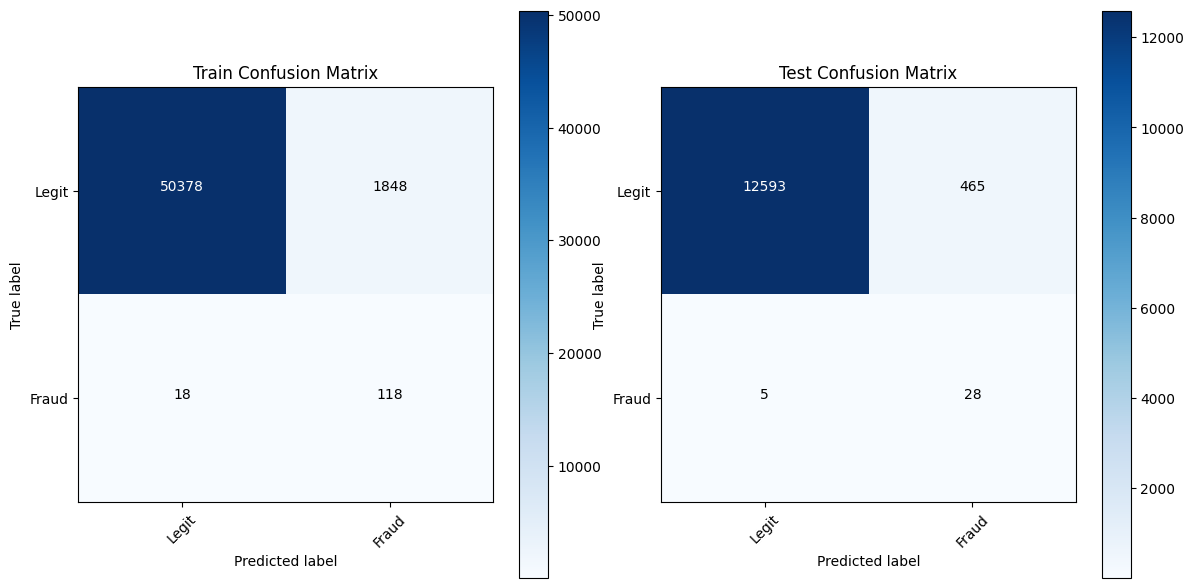

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Labeling the plot
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_confusion_matrix(cm_train, classes=['Legit', 'Fraud'], title='Train Confusion Matrix')

plt.subplot(1, 2, 2)
plot_confusion_matrix(cm_test, classes=['Legit', 'Fraud'], title='Test Confusion Matrix')

plt.show()



# Performance Metrics


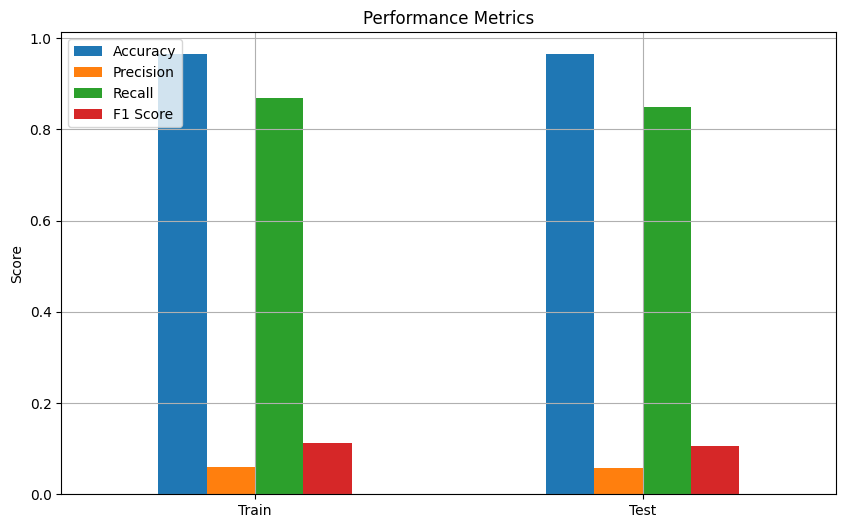

In [67]:
from sklearn.metrics import precision_score, recall_score, f1_score

results = {
    'Accuracy': [accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)],
    'Precision': [precision_score(y_train, y_pred_train), precision_score(y_test, y_pred_test)],
    'Recall': [recall_score(y_train, y_pred_train), recall_score(y_test, y_pred_test)],
    'F1 Score': [f1_score(y_train, y_pred_train), f1_score(y_test, y_pred_test)]
}

results_df = pd.DataFrame(results, index=['Train', 'Test'])
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(loc='upper left')
plt.show()


## Logistic Regression and Random Forest classifiers

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Scaling features since Logistic Regression is sensitive to the scale of input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=42)
# Train the model
lr_model.fit(X_train_scaled, y_train)
# Make predictions
y_pred_train_lr = lr_model.predict(X_train_scaled)
y_pred_test_lr = lr_model.predict(X_test_scaled)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
rf_model.fit(X_train_imputed, y_train)
# Make predictions
y_pred_train_rf = rf_model.predict(X_train_imputed)
y_pred_test_rf = rf_model.predict(X_test_imputed)

# Evaluate Logistic Regression
print("Logistic Regression Train set classification report:")
print(classification_report(y_train, y_pred_train_lr))
print("Logistic Regression Test set classification report:")
print(classification_report(y_test, y_pred_test_lr))

# Evaluate Random Forest
print("Random Forest Train set classification report:")
print(classification_report(y_train, y_pred_train_rf))
print("Random Forest Test set classification report:")
print(classification_report(y_test, y_pred_test_rf))

# Print accuracies
print("Logistic Regression Train set accuracy: ", accuracy_score(y_train, y_pred_train_lr))
print("Logistic Regression Test set accuracy: ", accuracy_score(y_test, y_pred_test_lr))
print("Random Forest Train set accuracy: ", accuracy_score(y_train, y_pred_train_rf))
print("Random Forest Test set accuracy: ", accuracy_score(y_test, y_pred_test_rf))


Logistic Regression Train set classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     52226
         1.0       0.76      0.62      0.69       136

    accuracy                           1.00     52362
   macro avg       0.88      0.81      0.84     52362
weighted avg       1.00      1.00      1.00     52362

Logistic Regression Test set classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13058
         1.0       0.87      0.61      0.71        33

    accuracy                           1.00     13091
   macro avg       0.93      0.80      0.86     13091
weighted avg       1.00      1.00      1.00     13091

Random Forest Train set classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     52226
         1.0       1.00      1.00      1.00       136

    accuracy                  

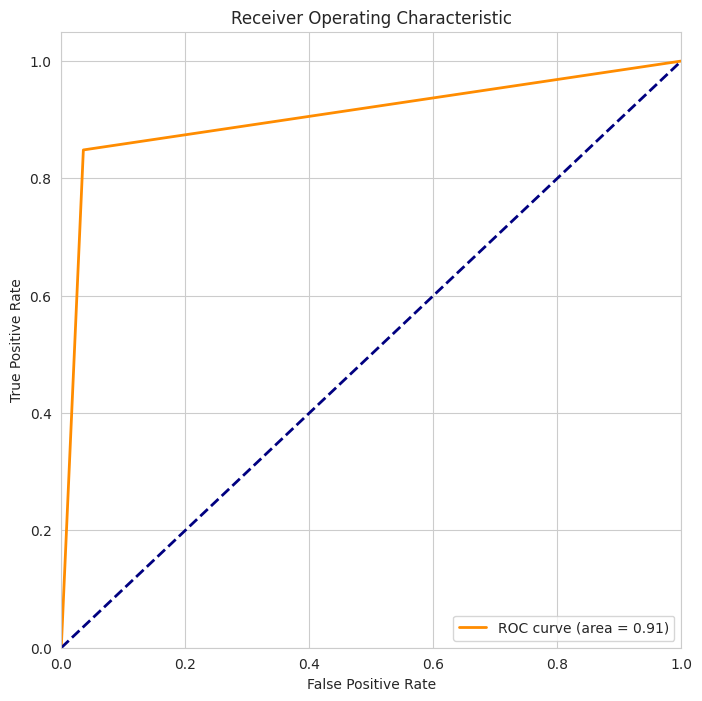

In [73]:
from sklearn.metrics import roc_curve, auc

# Assuming y_test and y_score are already defined
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Comparison of Results

Let's break down the results for each model and compare them across the metrics of **precision, recall, f1-score**, and **accuracy** for both the training and test sets.

#### 1. **Logistic Regression**
- **Training Set:**
  - **Precision:** 1.00 for legit cases (0.0) and 0.76 for fraud cases (1.0).
  - **Recall:** 1.00 for legit cases and 0.62 for fraud cases.
  - **Accuracy:** 99.85%.
  - **Observations:** Logistic Regression is very good at identifying legit transactions, but struggles somewhat with fraud detection (only 62% recall). However, it balances that with reasonably good precision (76%) for fraud cases.

- **Test Set:**
  - **Precision:** 1.00 for legit cases and 0.87 for fraud cases.
  - **Recall:** 1.00 for legit cases and 0.61 for fraud cases.
  - **Accuracy:** 99.88%.
  - **Observations:** The model generalizes well, maintaining almost the same performance on fraud detection as on the training set. The slight drop in recall for fraud detection is expected given the imbalance in the data.

#### 2. **Random Forest**
- **Training Set:**
  - **Precision & Recall:** 1.00 for both legit and fraud cases.
  - **Accuracy:** 100%.
  - **Observations:** The model is perfect on the training data, but this could be an indication of overfitting, as it completely memorizes the training set.

- **Test Set:**
  - **Precision:** 1.00 for legit cases and 0.96 for fraud cases.
  - **Recall:** 1.00 for legit cases and 0.76 for fraud cases.
  - **Accuracy:** 99.93%.
  - **Observations:** Random Forest maintains strong performance on the test set, with a slightly better fraud detection precision and recall than Logistic Regression. It performs well overall without overfitting too much.

#### 3. **Isolation Forest (Anomaly Detection)**
- **Training Set:**
  - **Precision:** 1.00 for legit cases and 0.06 for fraud cases.
  - **Recall:** 0.96 for legit cases and 0.87 for fraud cases.
  - **Accuracy:** 96.44%.
  - **Observations:** Isolation Forest performs well in terms of detecting fraud (87% recall), but the precision for fraud detection is very low (6%). This means that while it identifies most fraud cases, it also incorrectly classifies many legit cases as fraud.

- **Test Set:**
  - **Precision:** 1.00 for legit cases and 0.06 for fraud cases.
  - **Recall:** 0.96 for legit cases and 0.85 for fraud cases.
  - **Accuracy:** 96.41%.
  - **Observations:** The test set performance is similar to the training set, with high recall but low precision for fraud cases. This means it captures a lot of fraud cases but at the cost of generating a high number of false positives.

### Conclusion:

- **Logistic Regression** performs well overall, but it sacrifices some fraud detection capability for the sake of achieving perfect accuracy for legit cases. It's suitable when the priority is to avoid falsely identifying legit transactions as fraud, but it misses out on some fraud cases.
  
- **Random Forest** outperforms Logistic Regression slightly in terms of fraud detection, especially in recall (0.76 for Random Forest vs. 0.61 for Logistic Regression). It achieves this without losing too much precision. It is a balanced model for this use case and is likely the best performing model overall.

- **Isolation Forest** has excellent fraud recall (0.87), meaning it catches more fraud cases than the other models. However, its precision is poor (0.06), meaning it misclassifies a lot of legit cases as fraud. This model could be useful in situations where catching as much fraud as possible is a higher priority than avoiding false positives.

### Recommendations:

- **Random Forest** seems to strike the best balance between precision and recall, making it the most suitable model for this task if the goal is balanced fraud detection with minimal false positives.
  
- **Isolation Forest** could be used in conjunction with another model if the focus is on fraud recall, but it requires additional filtering or review of the flagged transactions to avoid excessive false positives.

- **Logistic Regression** is the simplest and still effective in detecting fraud cases but might not be the best option in situations where detecting all fraud cases is crucial, as its recall for fraud is the lowest.